# `ANOVA Explained`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Understand technique and background/motivation
+ visually, see what is going on for clarification
+ Show example implemented

**Help Support the Channel: Buy Me A Coffee, @mrfugudatasci**

`Good Read: Statistics An Introduction by Michael J. Crawley`

In [12]:
library(ggplot2)
library(tidyverse)
library(reshape2)
library(tidyr)

# `What is ANOVA?`

# <font color=red>AN</font>alysis <font color=red>O</font>f <font color=red>VA</font>riance

A technique used when all explanatory variables are categorical.
+ The explanatory variables are called factors
+ Idea of ANOVA `compares 2 or more, means` ($\mu's$)
    + This is done by calculating the variance ($\sigma^2$)

`This is a Hypothesis Test:`
+ The `null hypothesis` ($H_o$) : all samples means ($\mu's$) are equal or they don't have any significant difference $H_o: \mu_1=\mu_2=\mu_3...$ 

# `Why Not Just do a T-test?`
+ Well, you are going to have issues going above 2 sample $\mu's$ for comparisons. You will have to get combinations of all of them.

`ex.) if we had 3 sample means with an alpha=0.05` then we would end up with $(0.95)*(0.95)*(0.95)=0.8573$ then you need to do $1-0.8573 = 0.143$ error rate increased! *NOT GOOD*

# `Assumptions:`

+ `Random Sampling`
+ `Equal Variance`
+ `Independence of Errors`
+ `Normal Distributions of Errors`
+ `Additive Treatment Effects`

`Random Sampling:` if data were not collected randomly, then there will be probability bias.

`Equal Variance:` assuming that the `sampling errors` don't differ significantly from one treatment to the next. Meaning that the `SSE` doen't differ significantly.
+ ANOVA: is comparing the differences of `between` treatment/group means and `within` treatment/group variations.
    + `NOTE:` of the variances are the same-ish, but the means are different don't assume that the treatments are giving same effects.
    
`Independence of Error:` you will find that your errors are not independent for real data, more often than not this is why we have to (find ways to) minimize this.

`Here are a few a ways:`
+ consider `block designs` which are creating combinations of your experiment
+ try to do `grouping/membership` beforehand, then try `block design` 
+ you can try `replication`
+ `randomizing` your data

`Normal Distributions of Errors:` since most dataset have skewness anyway (i.e. real data). we need to figure out ways to combat this.

`Additive Treatment Effects:` for multi-factor experiments; ANOVA assumes that the different treatments are additive. For example, if we had an experiment with 2 treatments and multiple levels we could assume that the response to treatments could be added together even if one had high dosage and the other had a low dosage.
+ But, if there was an interaction we would have to set this up differently. if you have a multiplicative event then try using a transformation of the data such as taking a log.

# `Between Group Variability:`

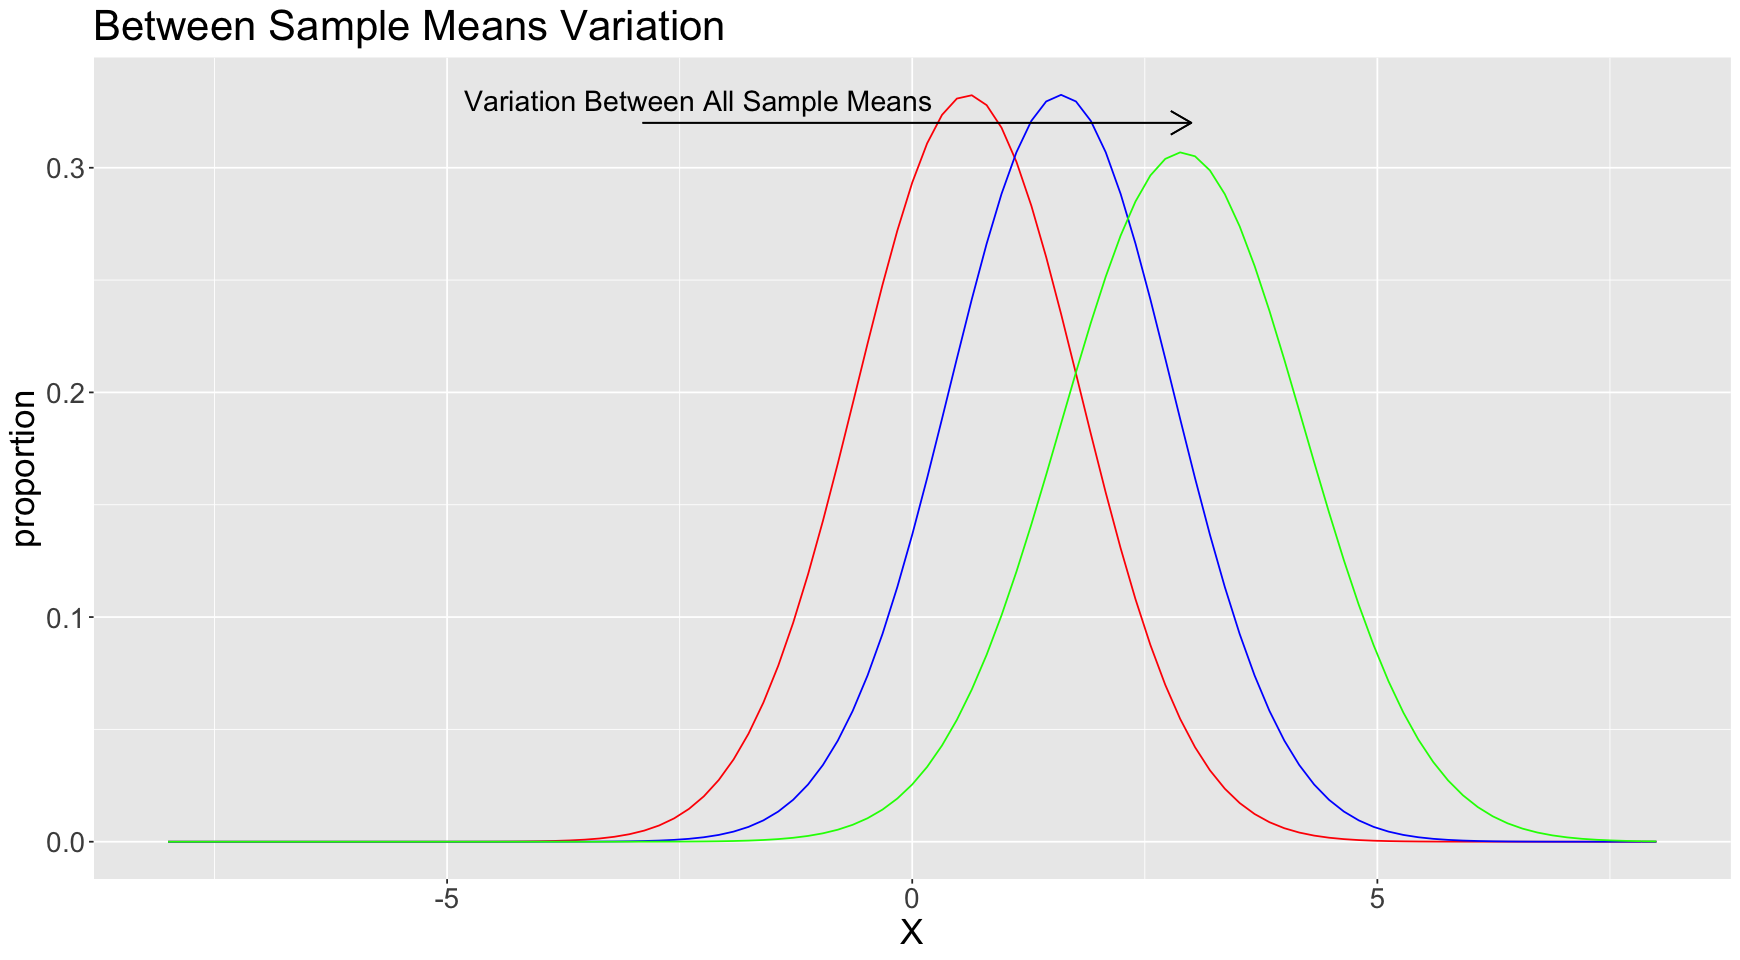

In [104]:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(data.frame(x = c(-8, 8)), aes(x)) + 
  mapply(function(mean, sd, col) {
    stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
  }, 
  # enter means, standard deviations and colors here
  mean = c(.6, 1.6,2.9 ), 
  sd = c(1.2, 1.2, 1.3), 
  col = c('red', 'blue', 'green')
) +
labs(title = "Between Sample Means Variation",
       x = "X",
       y = "proportion") +
theme(text=element_text(size=21))+
geom_segment(aes(x = -2.9, y = .32, xend = 3, yend = .32),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -2.3, y = .33, label = 'Variation Between All Sample Means',size=6)

# `Within Group Variability:`

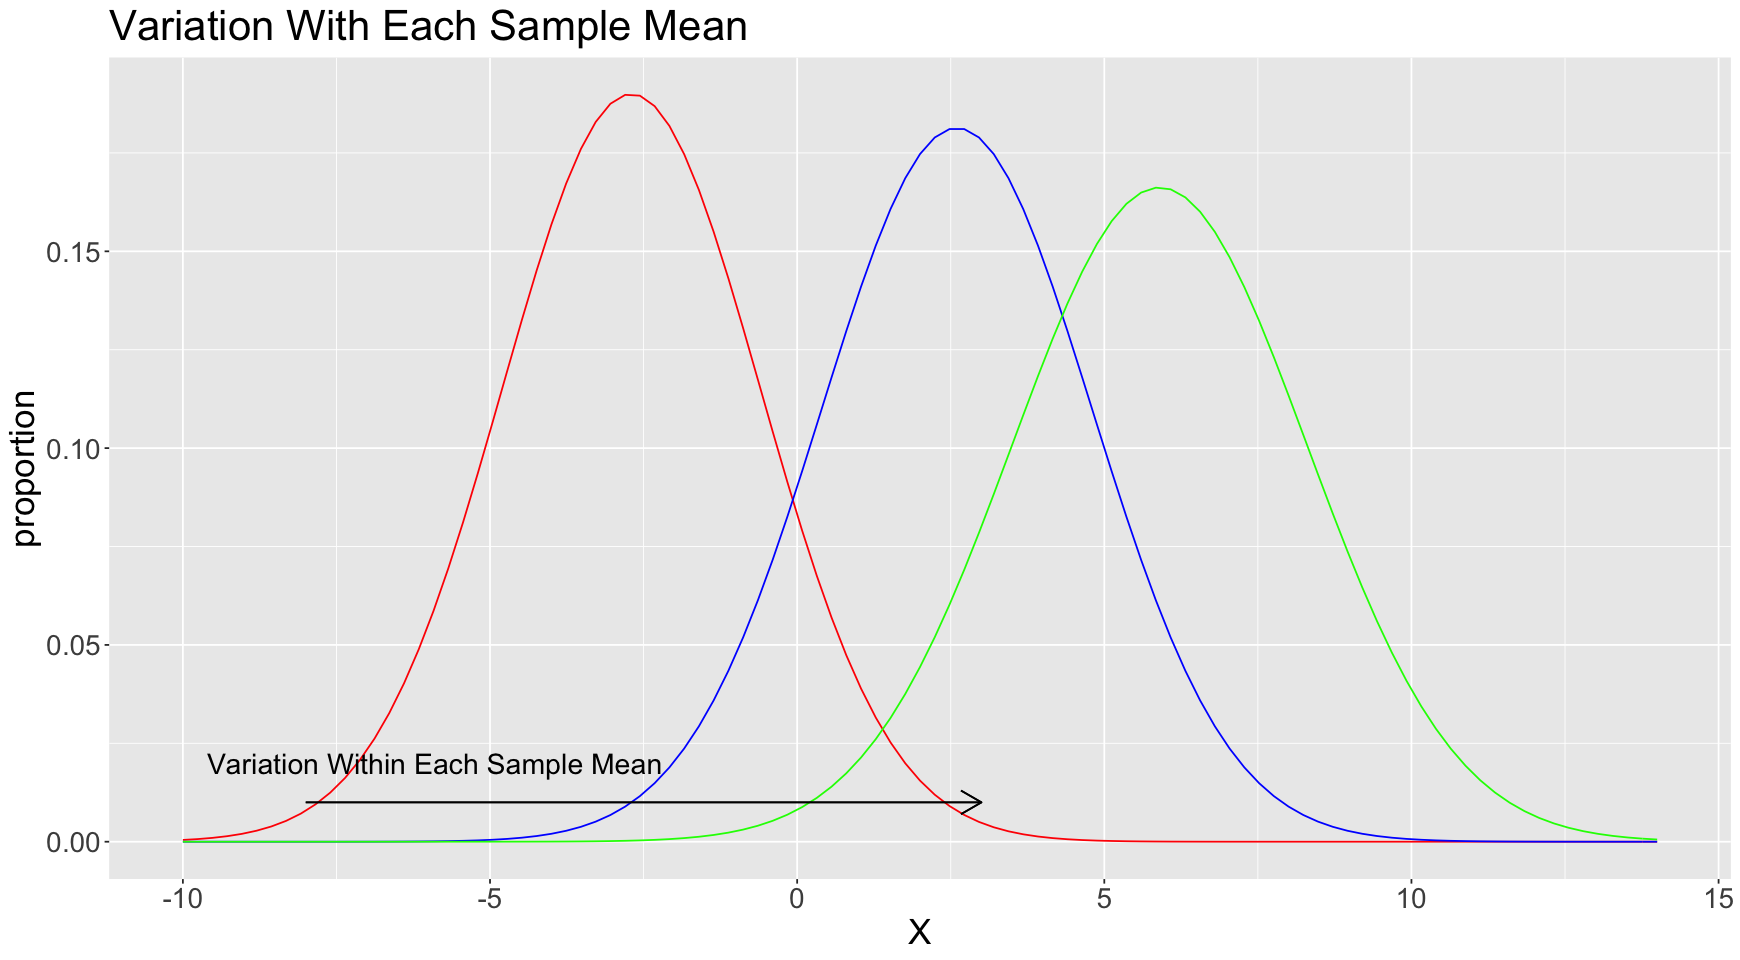

In [145]:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(data.frame(x = c(-10, 14)), aes(x)) + 
  mapply(function(mean, sd, col) {
    stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
  }, 
  # enter means, standard deviations and colors here
  mean = c(-2.7, 2.6,5.9 ), 
  sd = c(2.1, 2.2, 2.4), 
  col = c('red', 'blue', 'green')
) +
labs(title = "Variation With Each Sample Mean",
       x = "X",
       y = "proportion") +
theme(text=element_text(size=21))+
geom_segment(aes(x = -8, y = .01, xend = 3, yend = .01),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate('text', x = -5.9, y = .02, label = 'Variation Within Each Sample Mean',size=6)

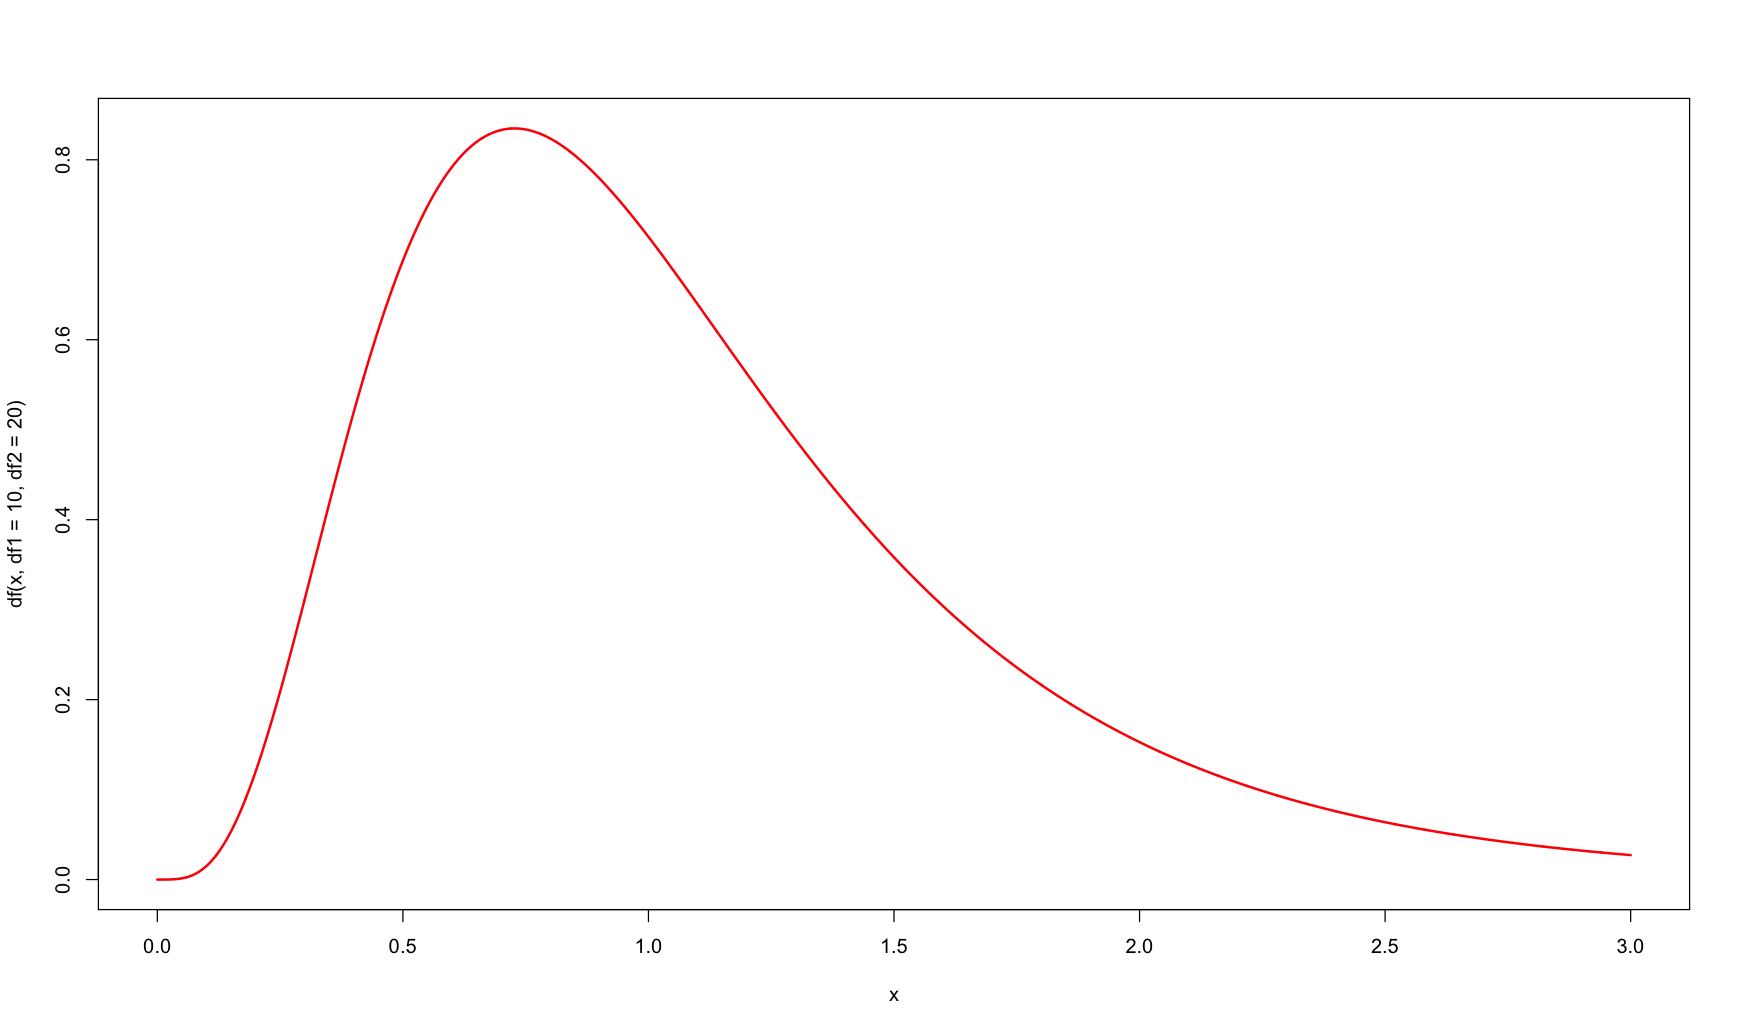

In [35]:
options(repr.plot.width=14.5, repr.plot.height=8.6)
x <- rf(100000, df1 = 10, df2 = 20)
# hist(x, 
#      breaks = 'Scott', 
#      freq = FALSE, 
#      xlim = c(0,3), 
#      ylim = c(0,1))
# #      xlab = '') 
# #      main = (TeX('Histogram for a $\\F$-distribution with $\\v_1 = 10$ and $\\v_2 = 20$ degrees of freedom (df)')), cex.main=0.9)
# par(new=TRUE)
curve(df(x, df1 = 10, df2 = 20), from = 0, to = 3, n = 5000, col= 'red', lwd=2, add = T)

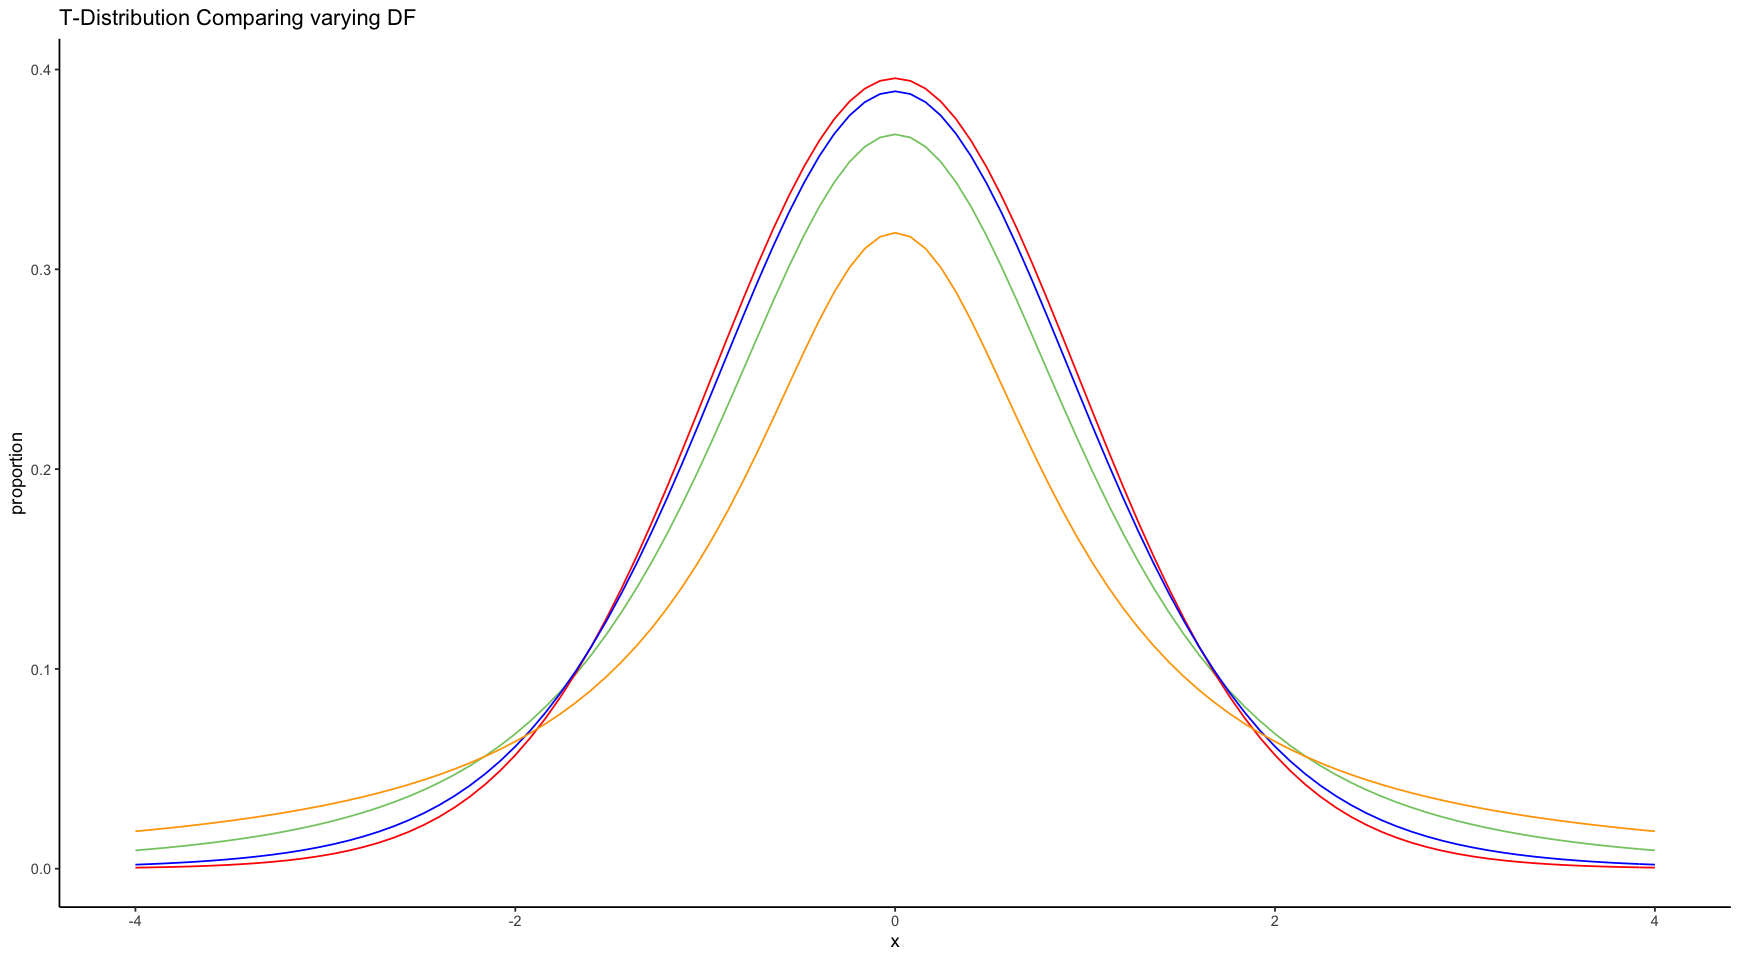

In [95]:
# As You ICREASE THE DEGREES OF FREEDOM APPROACHES NORMAL DISTRIBUTION
options(repr.plot.width=14.5, repr.plot.height=8)

p <- data_frame(x = c(-4,4)) %>% 
    ggplot(aes(x = x)) 

p + stat_function(fun = dt, args = list(df = 3), color = "#84CA72", size = .5) +
    stat_function(fun = dt, args = list(df = 30), size = .5,color='red')  +
    stat_function(fun = dt, args = list(df = 10), size = .5,color='blue')+
    stat_function(fun = dt, args = list(df = 1), size = .5,color='orange')+
    ggtitle("T-Distribution Comparing varying DF") +
    xlab("x") +
    ylab("proportion") +
    theme_classic()


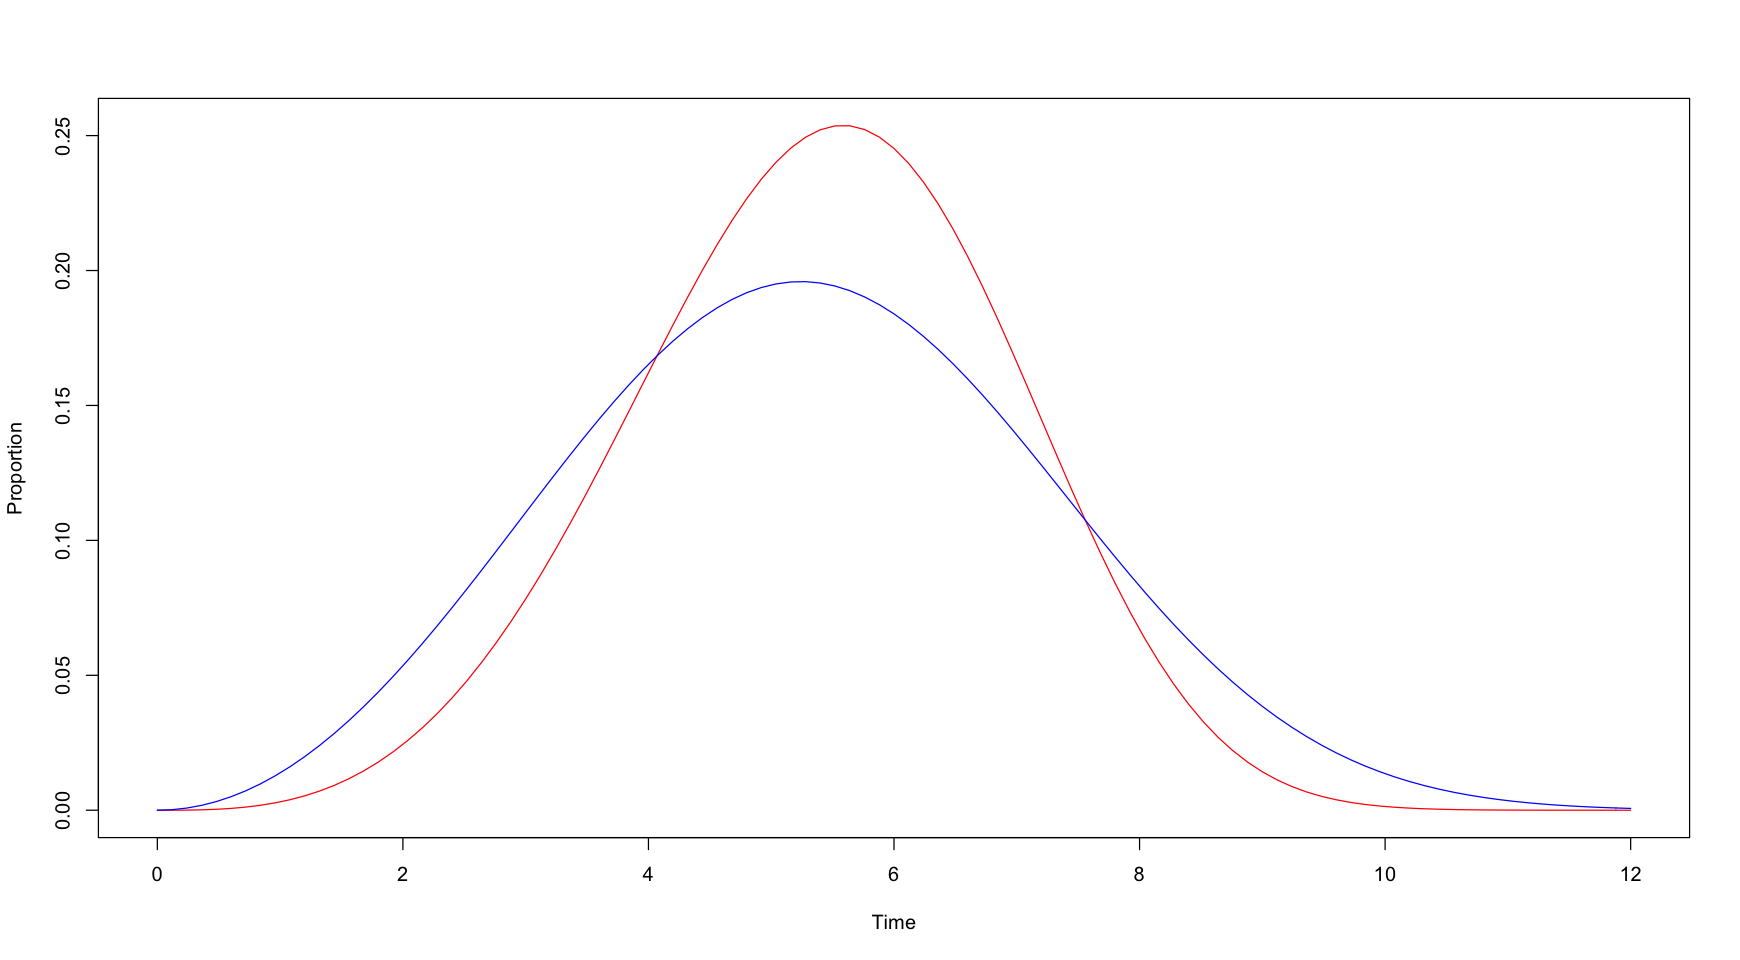

In [94]:
options(repr.plot.width=14.5, repr.plot.height=8)

curve(dweibull(x, shape=4, scale = 6), from=0, to=12, col='red',xlab = "Time",
      ylab = "Proportion")
curve(dweibull(x, shape=3, scale = 6), from=0, to=12, col='blue', add=TRUE)

# `F-Test:`

+ Measures if the means of different samples are significantly different
    + The lower the F-ratio, the more similar the sample means ($\mu's$)
        + And therefore keep (fail to reject) the null hypothesis ($H_o$)

`F_stat = between group variability / within group variability` 

`---------`

+ As the numerator grows, the sample ($\mu's$) grow apart meaning that they come from different populations.

+ `Important:` if the F-stat we calculate is more than the F-critical at a specific $\alpha$ then we will reject the $H_o$
    + this means that any value to the right of our $\alpha$ will be the rejeciton area
+ If the `within` value is smaller than the `between` then the F-stat will be smaller and we will have `No significant difference` between $\mu's$

+ On the otherhand, if the F-stat is larger than 1, it will mean that our data came from different populations 
`ex.) if we had` <font size=5>$\frac{Large_{(Btwn)}}{Small_{(w/i)}}=Reject H_o$</font>

+ This can occur if we had 1 or more $\mu's$ that were an outlier.
    + Then this can create a large variance descrepancy for us

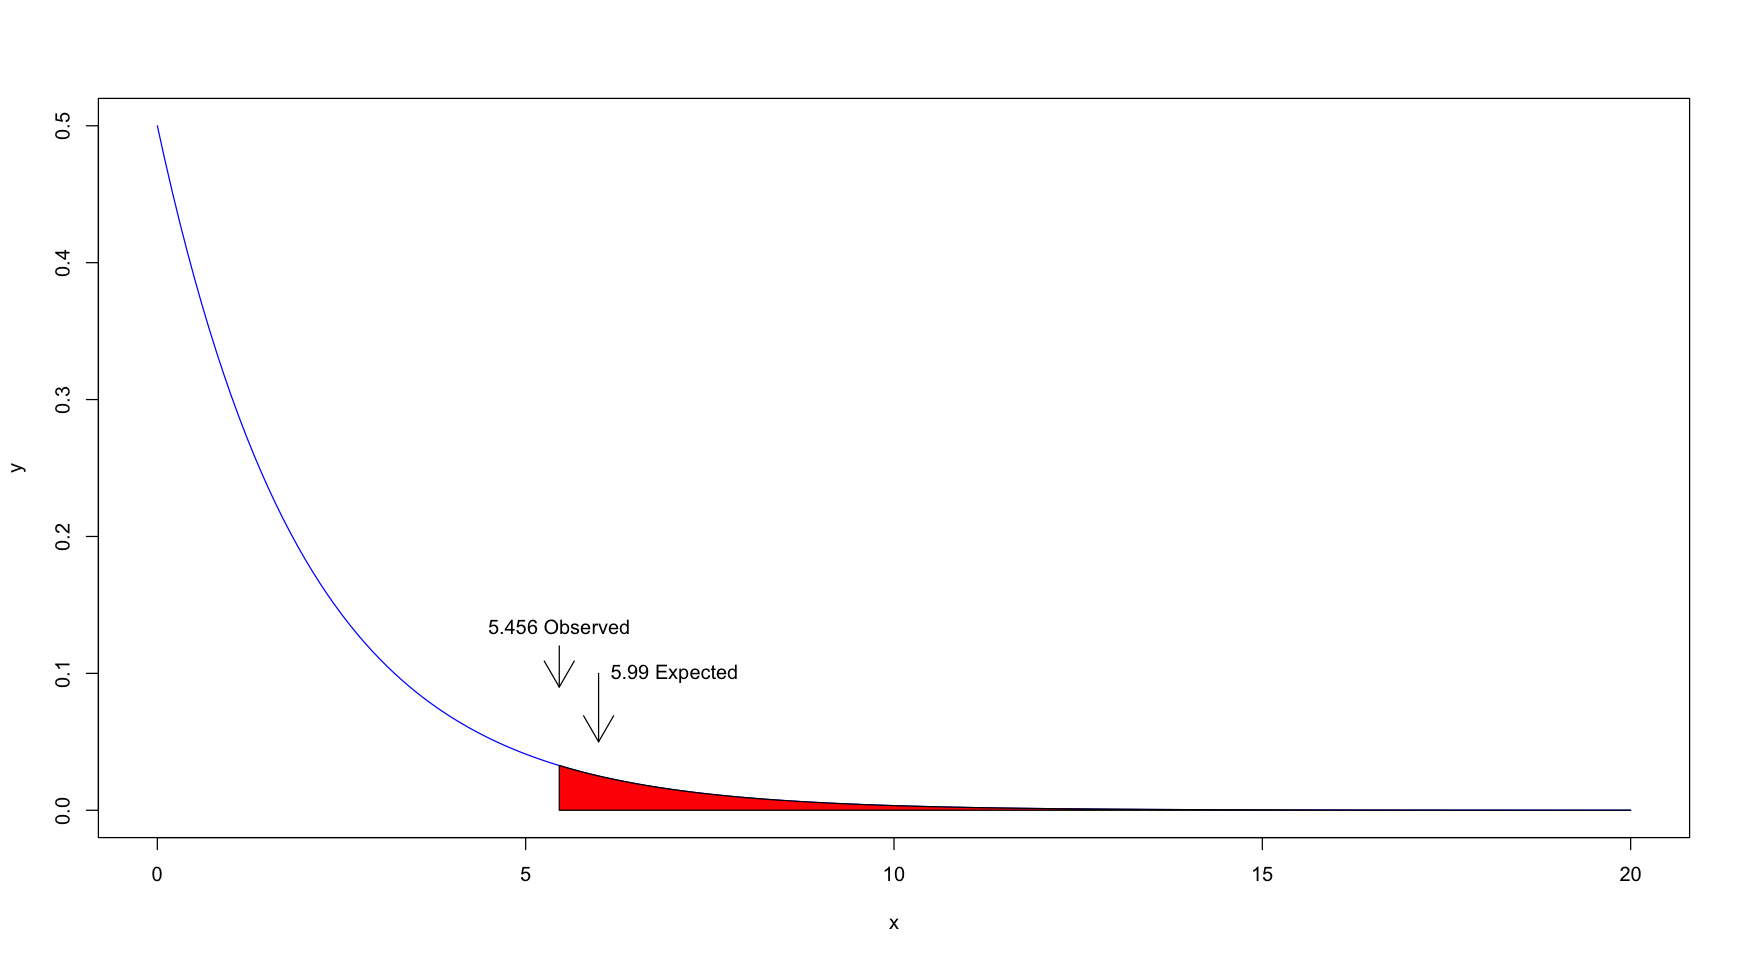

In [107]:
options(repr.plot.width=14.5, repr.plot.height=8)

x=seq(0,20,length=200)
y=dchisq(x,2)
plot(x,y,type="l",col="blue")
xx=seq(5.456,20,length=100)
yy=dchisq(xx,2)
polygon(c(5.456,xx,20),c(0,yy,0),col="red")
arrows(5.456,0.12,5.456,0.09)
text(5.456,0.12,"5.456 Observed",pos=3)
arrows(5.99,.1,5.99,.05)
text(5.99,.1,"5.99 Expected",pos=4)

In [39]:
# library(data.table)
# library(dplyr)
# library(ggplot2)
# library(tidyverse)
# library(reshape2)
# library(tidyr)
# library(data.table)
# set.seed(65432)


# y_axis <- dchisq(seq(0,23,by=.1), df=2, ncp = 0, log = FALSE)
# x_axis <- seq(0,23,by=.1)
# Samp<- data.table(xaxis = x_axis, yaxis=y_axis)

# cuts<- data.frame(Ref = c("Observed chi-stat: 5.456", "Expected chi-stat: 5.99"),
#                    vals = c(qchisq(.95,df=2),chi_sq),
#                    stringsAsFactors = FALSE)

# ggplot(Samp, aes(xaxis,yaxis))+geom_point(size=0.5)+
# theme(text=element_text(size=21))+
# geom_vline(xintercept=qchisq(.95,df=2))+
# # title
# ggtitle("95% confidence,Df=2; Observed vs Expected chi-stat")+
# geom_vline(xintercept = 5.456,linetype = "dashed", colour = "red",show.legend = FALSE)+
# # adjust text for vertical lines: 
# geom_text(mapping = aes(x = vals,
#                           y = 0,
#                           label = Ref,
#                           hjust = -1,
#                           vjust = -5,
#                          angle=90,size=20),
#                         data = cuts)

In [105]:
# options(repr.plot.width=14.5, repr.plot.height=8)

# ggplot(data.frame(x = c(-8, 8)), aes(x)) + 
#   mapply(function(mean, sd, col) {
#     stat_function(fun = dnorm, args = list(mean = mean, sd = sd), col = col)
#   }, 
#   # enter means, standard deviations and colors here
#   mean = c(.6, 1.6,2.9 ), 
#   sd = c(1.2, 1.2, 1.3), 
#   col = c('red', 'blue', 'green')
# ) +
# labs(title = "Between Sample Means Variation",
#        x = "X",
#        y = "proportion") +
# theme(text=element_text(size=21))+
# geom_segment(aes(x = -2.9, y = .32, xend = 3, yend = .32),
#                   arrow = arrow(length = unit(0.5, "cm")))+
# annotate('text', x = -2.3, y = .33, label = 'Variation Between All Sample Means',size=6)

# `Citations & Help:`

# ◔̯◔

https://crumplab.github.io/statistics/anova.html

https://www.investopedia.com/terms/a/anova.asp

https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/#:~:text=Analysis%20of%20variance%20(ANOVA)%20is,the%20means%20of%20different%20samples.&text=Another%20measure%20to%20compare%20the%20samples%20is%20called%20a%20t%2Dtest

https://www.scribbr.com/statistics/anova-in-r/

http://homepages.inf.ed.ac.uk/bwebb/statistics/ANOVA_in_R.pdf

http://pages.stat.wisc.edu/~yandell/st571/R/anova.pdf